# BUAN 6341: AI/ML Project

### Group 23 : Kaustubh Sharma, Tejas Kulkarni

## Classification Task

### Predicting customer churn using telecom customer data

#### Number of rows : 7042 , columns:16


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the data sets

In [80]:
cust=pd.read_csv("customer_data.csv")
inter=pd.read_csv("internet_data.csv")
df=pd.read_csv("churn_data.csv")


#### Merging all the 3 sets into 1 using a Primary key

In [81]:
df1 = pd.merge(cust,df, how='inner', on='customerID')
main_df=pd.merge(inter,df1,how='inner',on='customerID')

#### We will analyse the dataset. Look for Null values, duplicates and will perform EDA on that.

In [82]:
main_df

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Female,...,No,No,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No,Female,...,Yes,Yes,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [83]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   MultipleLines     7042 non-null   object 
 2   InternetService   7042 non-null   object 
 3   OnlineSecurity    7042 non-null   object 
 4   OnlineBackup      7042 non-null   object 
 5   DeviceProtection  7042 non-null   object 
 6   TechSupport       7042 non-null   object 
 7   StreamingTV       7042 non-null   object 
 8   StreamingMovies   7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  tenure            7042 non-null   int64  
 14  PhoneService      7042 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7042 non-null   object 


#### Dropping the columns as they are not significant to our results

In [84]:
main_df=main_df.drop(columns=['Partner','Dependents','StreamingTV','PaperlessBilling','OnlineSecurity','customerID'])


#### After dropping the columns

In [85]:
main_df.columns

Index(['MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingMovies', 'gender', 'SeniorCitizen', 'tenure',
       'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

#### As there are no NaN values we are randomly putting them in the dataset

In [86]:
temp=main_df
temp = temp.mask(np.random.random(temp.shape) < .011)
temp.isnull().sum()

MultipleLines       66
InternetService     75
OnlineBackup        70
DeviceProtection    76
TechSupport         63
StreamingMovies     87
gender              84
SeniorCitizen       87
tenure              50
PhoneService        74
Contract            80
PaymentMethod       74
MonthlyCharges      76
TotalCharges        80
Churn               74
dtype: int64

In [87]:
temp

,MultipleLines,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,gender,SeniorCitizen,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No phone service,DSL,Yes,No,No,No,Female,0.0,1.0,No,Month-to-month,Electronic check,29.85,29.85,No
1,No,NaN,No,Yes,No,No,Male,0.0,34.0,Yes,One year,Mailed check,56.95,1889.5,No
2,No,DSL,Yes,No,No,No,Male,0.0,2.0,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,No phone service,DSL,No,Yes,Yes,No,Male,0.0,45.0,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,No,Fiber optic,No,No,No,No,Female,0.0,2.0,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,No,No,No internet service,No internet service,No internet service,No internet service,Female,0.0,72.0,Yes,Two year,Bank transfer (automatic),21.15,1419.4,No
7038,Yes,DSL,No,Yes,Yes,Yes,Male,0.0,24.0,Yes,One year,Mailed check,84.80,1990.5,No
7039,Yes,Fiber optic,Yes,Yes,No,Yes,Female,0.0,72.0,Yes,One year,Credit card (automatic),103.20,7362.9,No
7040,No phone service,DSL,No,No,No,No,Female,0.0,11.0,No,Month-to-month,Electronic check,29.60,346.45,No


In [88]:
temp['TotalCharges']=pd.to_numeric(temp['TotalCharges'],errors='coerce')

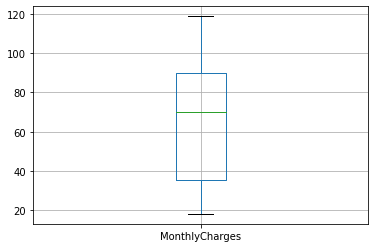

In [89]:
temp.boxplot(column=['MonthlyCharges'])
plt.show()

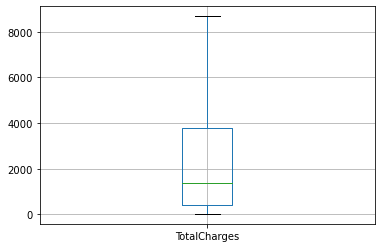

In [90]:
temp.boxplot(column=['TotalCharges'])
plt.show()

#### We will check for each columns the value counts 

In [91]:
temp['MultipleLines'].value_counts()

No                  3359
Yes                 2940
No phone service     677
Name: MultipleLines, dtype: int64

In [92]:
temp['InternetService'].value_counts()

Fiber optic    3061
DSL            2398
No             1508
Name: InternetService, dtype: int64

In [93]:
temp['OnlineBackup'].value_counts()

No                     3063
Yes                    2397
No internet service    1512
Name: OnlineBackup, dtype: int64

In [94]:
temp['DeviceProtection'].value_counts()

No                     3061
Yes                    2396
No internet service    1509
Name: DeviceProtection, dtype: int64

In [95]:
temp['TechSupport'].value_counts()

No                     3439
Yes                    2025
No internet service    1515
Name: TechSupport, dtype: int64

In [96]:
temp['StreamingMovies'].value_counts()

No                     2753
Yes                    2696
No internet service    1506
Name: StreamingMovies, dtype: int64

In [97]:
temp['gender'].value_counts()

Male      3513
Female    3445
Name: gender, dtype: int64

In [98]:
temp['Contract'].value_counts()

Month-to-month    3832
Two year          1673
One year          1457
Name: Contract, dtype: int64

In [99]:
temp['PaymentMethod'].value_counts()

Electronic check             2343
Mailed check                 1596
Bank transfer (automatic)    1526
Credit card (automatic)      1503
Name: PaymentMethod, dtype: int64

In [100]:
temp['TotalCharges']=pd.to_numeric(temp['TotalCharges'],errors='coerce')

#### We will drop the rows with values 'No internet service' from the respective columns

In [101]:
temp.drop(temp.loc[temp['OnlineBackup']=='No internet service'].index, inplace=True)
temp.drop(temp.loc[temp['DeviceProtection']=='No internet service'].index, inplace=True)
temp.drop(temp.loc[temp['TechSupport']=='No internet service'].index, inplace=True)
temp.drop(temp.loc[temp['StreamingMovies']=='No internet service'].index, inplace=True)

In [102]:
temp.isnull().sum()

MultipleLines       56
InternetService     57
OnlineBackup        56
DeviceProtection    59
TechSupport         52
StreamingMovies     67
gender              64
SeniorCitizen       65
tenure              33
PhoneService        63
Contract            59
PaymentMethod       52
MonthlyCharges      67
TotalCharges        68
Churn               59
dtype: int64

#### Earlier there were 7042 rows, after the drop we can see there are reduced rows.

In [103]:
len(temp.index)

5516

#### As we can see from the value counts output we are replacing the NaN values with the most frequent values occuring.

In [104]:


temp['InternetService'].replace(np.NaN,'Fiber optic', inplace = True)
temp['PaymentMethod'].replace(np.NaN,'Credit card (automatic)', inplace = True)
temp['Contract'].replace(np.NaN,'Two year', inplace = True)
temp['PaymentMethod'].replace(np.NaN,'Credit card (automatic)', inplace = True)
temp['MonthlyCharges'].replace(np.NaN, temp['MonthlyCharges'].median(), inplace = True)

In [105]:
temp.isnull().sum()

MultipleLines       56
InternetService      0
OnlineBackup        56
DeviceProtection    59
TechSupport         52
StreamingMovies     67
gender              64
SeniorCitizen       65
tenure              33
PhoneService        63
Contract             0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        68
Churn               59
dtype: int64

#### After checking for the null values finally we are dropping all the rest NaN values from the dataset.

In [199]:
temp=temp.dropna()
temp.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
DeviceProtection_No                        0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_Yes                            0
StreamingM

In [ ]:
temp['OnlineBackup'] = temp['OnlineBackup'].astype('category')

#### Creating dummy variables

In [108]:
one_hot = pd.get_dummies(temp['OnlineBackup'], prefix = 'OnlineBackup')
temp = temp.drop('OnlineBackup',axis = 1)
temp = temp.join(one_hot)


In [109]:
one_hot = pd.get_dummies(temp['MultipleLines'], prefix = 'MultipleLines')
temp = temp.drop('MultipleLines',axis = 1)
temp = temp.join(one_hot)

In [110]:
one_hot = pd.get_dummies(temp['InternetService'], prefix = 'InternetService')
temp = temp.drop('InternetService',axis = 1)
temp = temp.join(one_hot)


In [111]:
one_hot = pd.get_dummies(temp['Contract'], prefix = 'Contract')
temp = temp.drop('Contract',axis = 1)
temp = temp.join(one_hot)

In [112]:
one_hot = pd.get_dummies(temp['PaymentMethod'], prefix = 'PaymentMethod')
temp = temp.drop('PaymentMethod',axis = 1)
temp = temp.join(one_hot)

In [113]:
one_hot = pd.get_dummies(temp['DeviceProtection'], prefix = 'DeviceProtection')
temp = temp.drop('DeviceProtection',axis = 1)
temp = temp.join(one_hot)

In [114]:
one_hot = pd.get_dummies(temp['TechSupport'], prefix = 'TechSupport')
temp = temp.drop('TechSupport',axis = 1)
temp = temp.join(one_hot)

In [115]:
one_hot = pd.get_dummies(temp['StreamingMovies'], prefix = 'StreamingMovies')
temp = temp.drop('StreamingMovies',axis = 1)
temp = temp.join(one_hot)

In [116]:
temp=temp.drop(columns=['SeniorCitizen'])

In [117]:
one_hot = pd.get_dummies(temp['PhoneService'], prefix = 'PhoneService')
temp = temp.drop('PhoneService',axis = 1)
temp = temp.join(one_hot)

In [118]:
one_hot = pd.get_dummies(temp['gender'], prefix = 'gender')
temp = temp.drop('gender',axis = 1)
temp = temp.join(one_hot)
temp

,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,PhoneService_No,PhoneService_Yes,gender_Female,gender_Male
0,1.0,29.85,29.85,No,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,34.0,56.95,1889.50,No,1,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1
2,2.0,53.85,108.15,Yes,0,1,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
3,45.0,42.30,1840.75,No,1,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
4,2.0,70.70,151.65,Yes,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,12.0,60.65,743.30,No,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,1,0
7038,24.0,84.80,1990.50,No,1,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
7039,72.0,103.20,7362.90,No,0,1,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
7040,11.0,29.60,346.45,No,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


#### Checking Churn Values

In [119]:
temp['Churn'].value_counts()

No     3344
Yes    1565
Name: Churn, dtype: int64

#### Convering them to binary 

In [120]:
churn = {'No': 0, 'Yes': 1}
temp['Churn'] = temp['Churn'].replace(churn)
temp.head()

,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,PhoneService_No,PhoneService_Yes,gender_Female,gender_Male
0,1.0,29.85,29.85,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,34.0,56.95,1889.50,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1
2,2.0,53.85,108.15,1,0,1,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
3,45.0,42.30,1840.75,0,1,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
4,2.0,70.70,151.65,1,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0


In [127]:
temp['Churn'].value_counts()

0    3344
1    1565
Name: Churn, dtype: int64

#### We can see from churn data that 1565 customer are churning i.e leaving the company. So we are predicting all 1(Yes) for the best accuracy

## Applying all the classification models.

# 1. KNN Classifier

In [122]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [123]:
X = temp.drop(['Churn'], axis = 1)
y = temp['Churn']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn_tr_sc = []
knn_te_sc = []

for k in range(1,20):
    knnc = KNeighborsClassifier(k)
    knnc.fit(X_train, y_train)
    knn_tr_sc.append(knnc.score(X_train, y_train))
    knn_te_sc.append(knnc.score(X_test, y_test))

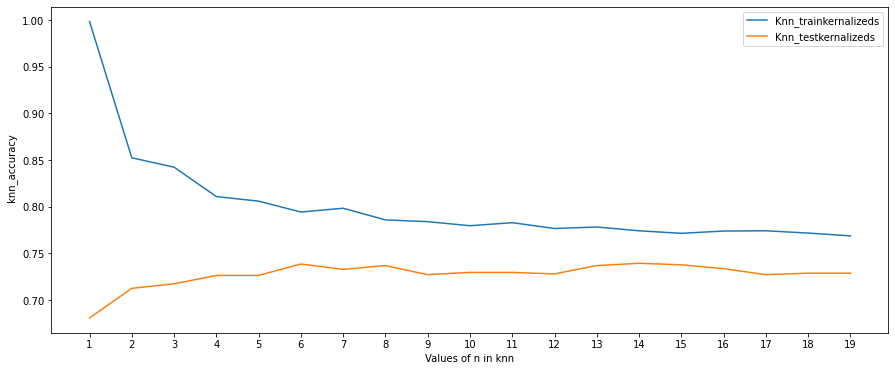

In [125]:
r_n = range(1,20)
%matplotlib inline

plt.subplots(figsize = (15,6))
plt.plot(r_n, knn_tr_sc, label = 'Knn_trainkernalizeds', )
plt.plot(r_n, knn_te_sc, label = 'Knn_testkernalizeds', )
plt.xlabel('Values of n in knn')
plt.ylabel(' knn_accuracy')
plt.xticks(range(1,20))
plt.legend()

#### We are using Recall scoring function to reduce Type 1 error. We are reducing False Negative error. Those who are No turned out to be Yes

#### Using Grid Search to find best parameter

In [129]:
from sklearn.model_selection import GridSearchCV
paramgridknn = {'n_neighbors':range(1,20), 
                  'p': [1,2],
                'weights': ['distance','uniform'],
                'metric': ['euclidean','manhattan'],
                   }

gsknn = GridSearchCV(KNeighborsClassifier(), paramgridknn , cv = 5,scoring='recall')
gs_model = gsknn.fit(X_train, y_train)

In [131]:
print('GrideSearch knn score :',gs_model.best_score_)
print('GrideSearch knn parameters :',gs_model.best_params_)

GrideSearch knn score : 0.5448190580105473
GrideSearch knn parameters : {'metric': 'euclidean', 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}


In [132]:
best_knncs = KNeighborsClassifier(metric= 'euclidean', n_neighbors = 18, weights = 'distance',p = 1)

best_knncs.fit(X_train, y_train)
y_pred_knncs = best_knncs.predict(X_test)

print('Knn train score: {:.4f} '.format(best_knncs.score(X_train, y_train)))
print('Knn test score: {:.4f} '.format(best_knncs.score(X_test, y_test)))

Knn train score: 0.9986 
Knn test score: 0.7280 


 __The graph shows, k=18 is the best value of number of neighbor__

In [133]:
knnc = KNeighborsClassifier(18)
knnc.fit(X_train, y_train)
print ("No of Neighbors:", 18)
print('Knn Train score: {:.4f}'.format(knnc.score(X_train, y_train)))
print('Knn Train score: {:.4f}'.format(knnc.score(X_test, y_test)))

No of Neighbors: 18
Knn Train score: 0.7718
Knn Train score: 0.7288


In [134]:
from sklearn.model_selection import cross_val_score

knncs = cross_val_score(knnc, X_train, y_train)
cs=({'knncross-validation score': knncs})
cs1=pd.DataFrame(cs)
cs1

,knncross-validation score
0,0.754410
1,0.732337
2,0.743207
3,0.728261
4,0.705163


In [135]:
print("Cross validation score for Knn",knncs.mean())

Cross validation score for Knn 0.7326754321278981


#### Knn cross validation score with cross fold 

In [136]:
from sklearn.model_selection import cross_val_score

knncs = cross_val_score(knnc, X_train, y_train, cv=5)
cs=({'knncross validation score': knncs})
cs1=pd.DataFrame(cs)
cs1

,knncross validation score
0,0.754410
1,0.732337
2,0.743207
3,0.728261
4,0.705163


In [137]:
print("cross validation score for Knn :",knncs.mean())

cross validation score for Knn : 0.7326754321278981


In [138]:
from sklearn.metrics import confusion_matrix
knncon_mat = confusion_matrix(y_pred_knncs,y_test)
print("Knn-matrix \n{}".format(knncon_mat))

Knn-matrix 
[[672 172]
 [162 222]]


In [139]:
!pip install mglearn

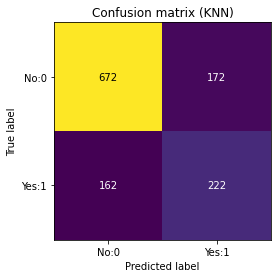

In [155]:
import mglearn
%matplotlib inline

scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_pred_knncs, y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [142]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, best_knncs.predict(X_test))
print('KNN Recall score : {:.4f} '.format(recall_score(y_test, best_knncs.predict(X_test))))

Knn_Precision_Score = precision_score(y_test, best_knncs.predict(X_test))
print('KNN Precision score : {:.4f} '.format(precision_score(y_test, best_knncs.predict(X_test))))

Knn_f1_Score = f1_score(y_test, best_knncs.predict(X_test))
print('KNN F1 score : {:.4f} '.format(f1_score(y_test, best_knncs.predict(X_test))))

KNN Recall score : 0.5635 
KNN Precision score : 0.5781 
KNN F1 score : 0.5707 


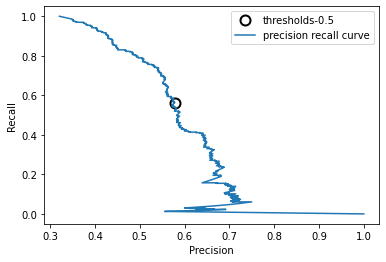

In [143]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, best_knncs.predict_proba(X_test)[:,1])

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_knncs, y_test,target_names=["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.81      0.80      0.80       844
          No       0.56      0.58      0.57       384

    accuracy                           0.73      1228
   macro avg       0.68      0.69      0.69      1228
weighted avg       0.73      0.73      0.73      1228



In [145]:
 CompTable = [['KNN Classification', gs_model.best_params_, best_knncs.score(X_train, y_train),best_knncs.score(X_test, y_test),
              recall_score(y_test, best_knncs.predict(X_test)),precision_score(y_test, best_knncs.predict(X_test)),
              f1_score(y_test, best_knncs.predict(X_test))]]
 print('Summary of Knn:',CompTable)

Summary of Knn: [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}, 0.9986416734582994, 0.7280130293159609, 0.5634517766497462, 0.578125, 0.570694087403599]]


# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
#c1 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
c1=np.linspace(0.01,1,100)
trainlogl1 = []
trainlogl2 = []
testlogl1 = []
testlogl2 = []

for c in c1:
    logl1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    logl2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    logl1.fit(X_train, y_train)
    logl2.fit(X_train, y_train)
    trainlogl1.append(logl1.score(X_train, y_train))
    trainlogl2.append(logl2.score(X_train, y_train))
    testlogl1.append(logl1.score(X_test, y_test))
    testlogl2.append(logl2.score(X_test, y_test))

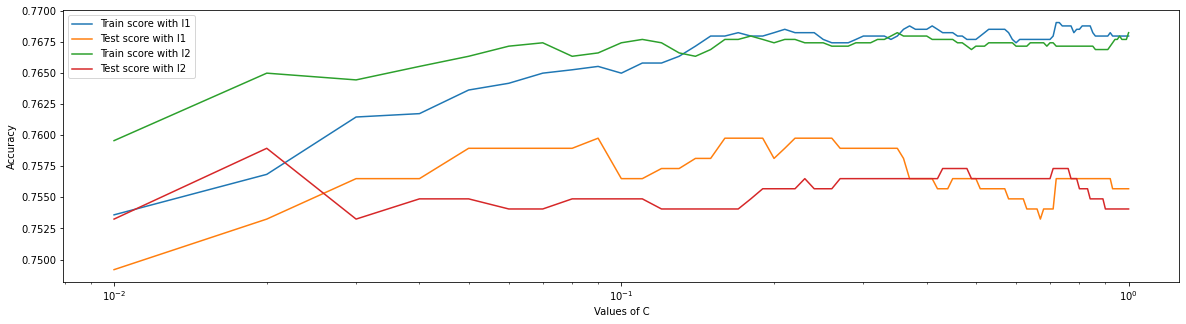

In [147]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c1, trainlogl1, label = 'Train score with l1')
plt.plot(c1, testlogl1, label = 'Test score with l1')
plt.plot(c1, trainlogl2, label = 'Train score with l2')
plt.plot(c1, testlogl2, label = 'Test score with l2')
plt.legend()
plt.xlabel('Values of C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [201]:
param_grid_log = { 'max_iter' : range(1,200), 
                  'penalty' : ['l1','l2'],
                'C' :np.linspace(0.01,1,20)}

gslog = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid_log, cv = 5, verbose = 1, n_jobs = -1,scoring='recall')
gslog_model = gslog.fit(X_train, y_train)

print('Best logistic grid search score',gslog_model.best_score_)
print('Best logistic grid search Parameter',gslog.best_params_)

Fitting 5 folds for each of 7960 candidates, totalling 39800 fits
Best logistic grid search score 0.5609856337515912
Best logistic grid search Parameter {'C': 0.5310526315789474, 'max_iter': 13, 'penalty': 'l2'}


#### __From the graph and grid search we can say that c=0.531 and penalty =l2 is best parameter and max_iter=13

### Logistic regression using best parameters 

In [202]:
best_log = LogisticRegression(penalty ='l2', C = 0.531, max_iter = 13)

bestlogmodel=best_log.fit(X_train,y_train)
ypredlog = best_log.predict(X_test)

print('Best logistic train score: {:.4f}'.format(best_log.score(X_train, y_train)))
print('Best logistic test score: {:.4f}'.format(best_log.score(X_test, y_test)))

Best logistic train score: 0.7664
Best logistic test score: 0.7549


In [67]:
#print(classification_report(ypredlog,X_test,target_names=["Yes", "No"]))

In [150]:
print(confusion_matrix(ypredlog,y_test))

[[700 167]
 [134 227]]


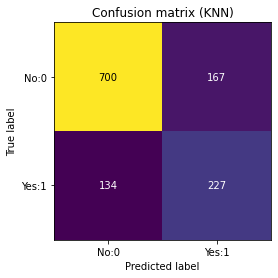

In [156]:
import mglearn
%matplotlib inline

scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(ypredlog, y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [157]:
Logistic_recallScore = recall_score(y_test, ypredlog)
print("Logistic recall score: {:.2f}".format(recall_score(y_test, ypredlog)))
Logistic_precision_score = precision_score(y_test, ypredlog)
print(" Logistic precision score: {:.2f}".format(precision_score(y_test, ypredlog)))
Logistic_f1_score = recall_score(y_test,ypredlog)
print("Logistic f1 score: {:.2f}".format(f1_score(y_test,ypredlog)))

Logistic recall score: 0.58
 Logistic precision score: 0.63
Logistic f1 score: 0.60


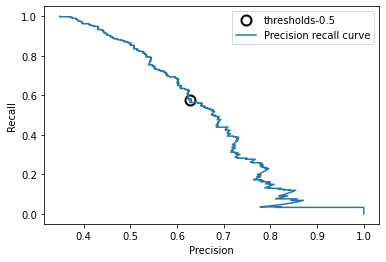

In [158]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_log.predict_proba(X_test)[:,1])

closezero_ = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[closezero_], recall[closezero_], 'o', markersize=10,
         label="thresholds-0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [159]:
CompTable =  CompTable + [['Logistic Regression', gslog.best_params_,
                            best_log.score(X_train, y_train), 
                            best_log.score(X_test, y_test),
                            recall_score(y_test, ypredlog),precision_score(y_test, ypredlog),
                            f1_score(y_test,ypredlog)
                          ]]

print('Summary of Logistic regression:', [['Logistic Regression',gslog.best_params_,'Logistic Train Score:',
                            'Logistic Train Score:',best_log.score(X_train, y_train), 
                            'Logistic Test Score:',best_log.score(X_test, y_test)]])

Summary of Logistic regression: [['Logistic Regression', {'C': 0.5310526315789474, 'max_iter': 13, 'penalty': 'l2'}, 'Logistic Train Score:', 'Logistic Train Score:', 0.7663678348274925, 'Logistic Test Score:', 0.754885993485342]]


# Linear Support Vector Machine Classifier

In [214]:
from sklearn.svm import LinearSVC,SVC

c1 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

LinearTrain = []
LinearTest = []

for c in c1:
    LinearSVM = LinearSVC(C = c)
    LinearSVM.fit(X_train, y_train)
    LinearTrain.append(LinearSVM.score(X_train, y_train))
    LinearTest.append(LinearSVM.score(X_test, y_test))

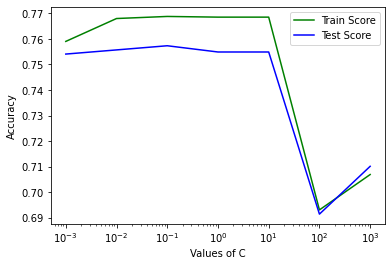

In [215]:
%matplotlib inline

plt.plot(c1, LinearTrain, label = 'Train Score', c = 'g')
plt.plot(c1, LinearTest, label = 'Test Score', c = 'b')
plt.xscale('log')
plt.xlabel('Values of C')
plt.ylabel('Accuracy')
plt.legend()

In [216]:
from sklearn.model_selection import GridSearchCV
paramgridsvm = { 'max_iter' : range(1,150),
                'C' : [1,10,100,1000,10000]}

svmgs = GridSearchCV(estimator =LinearSVM(), param_grid = paramgridsvm ,cv = 5, n_jobs = -1,scoring='recall')

svmgsmodel= svmgs.fit(X_train, y_train)
print('Best grid search score for SVM :',svmgsmodel.best_score_)
print('Best grid search Parameter for SVM :',svmgsmodel.best_params_)

Best grid search score for SVM : 0.8846699399890889
Best grid search Parameter for SVM : {'C': 100, 'max_iter': 20}


Accuracy drops at C=100

In [217]:
svm = LinearSVC(C = 100)
svm.fit(X_train, y_train)

print('Train score: ',(svm.score(X_train, y_train)))
print('Test score:  ',(svm.score(X_test, y_test)))

Train score:  0.6886715566422168
Test score:   0.6807817589576547


In [218]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm, X_train, y_train)
cs = ({'Cross-validation scores for SVM':svm_scores })
cs1 =pd.DataFrame(cs)
cs1

,Cross-validation scores for SVM
0,0.735414
1,0.728261
2,0.671196
3,0.682065
4,0.722826


In [219]:
print("Average cross-validation score for SVM: ",(svm_scores.mean()))

Average cross-validation score for SVM:  0.7079523331956816


#### using best parameter

In [220]:
bestSVM = LinearSVC(C = 1000 ,max_iter = 88)
bestSVM.fit(X_train, y_train)
ypredSVM = bestSVM.predict(X_test)
 
print('Best SVM Train score: ',(bestSVM.score(X_train, y_train)))
print('Best SVM Test score: ',(bestSVM.score(X_test, y_test)))

Best SVM Train score:  0.7201847324096713
Best SVM Test score:  0.7280130293159609


In [221]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypredSVM, y_test))

[[619 119]
 [215 275]]


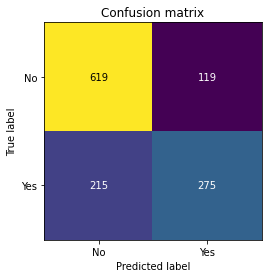

In [271]:
%matplotlib inline

scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(ypredSVM, y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No','Yes'],
    yticklabels=['No','Yes'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [223]:
print(classification_report(ypredSVM,y_test))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       738
           1       0.70      0.56      0.62       490

    accuracy                           0.73      1228
   macro avg       0.72      0.70      0.70      1228
weighted avg       0.72      0.73      0.72      1228



In [224]:
LinearSVC_recallScore = recall_score(y_test, ypredSVM)
print("SVM recall score: {:.2f}".format(recall_score(y_test,ypredSVM)))
LinearSVC_precision_score = precision_score(y_test, ypredSVM)
print("SVM precision score: {:.2f}".format(precision_score(y_test, ypredSVM)))
LinearSVC_f1_score = recall_score(y_test,ypredSVM)
print("SVM f1 score: {:.2f}".format(f1_score(y_test,ypredSVM)))

SVM recall score: 0.70
SVM precision score: 0.56
SVM f1 score: 0.62


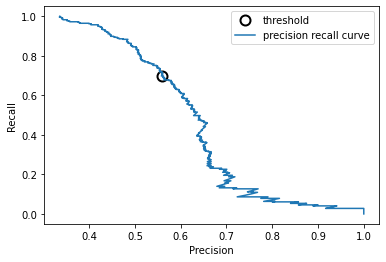

In [225]:
import mglearn
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, bestSVM.decision_function(X_test))

closezero_ = np.argmin(np.abs(thresholds))

plt.plot(precision[closezero_], recall[closezero_], 'o', markersize=10,
         label="threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [226]:
 CompTable =  CompTable+ [['Linear SVM Classifier', svmgsmodel.best_params_,
                            bestSVM.score(X_train, y_train), 
                           bestSVM.score(X_test, y_test),
                           recall_score(y_test,ypredSVM),precision_score(y_test, ypredSVM),
                           f1_score(y_test,ypredSVM)
                          ]]

print('Summary of SVM:',[['Linear SVM Classifier', svmgsmodel.best_params_,
                           'Train Score:', bestSVM.score(X_train, y_train), 
                           'Test Score:',bestSVM.score(X_test, y_test),]])

Summary of SVM: [['Linear SVM Classifier', {'C': 100, 'max_iter': 20}, 'Train Score:', 0.7201847324096713, 'Test Score:', 0.7280130293159609]]


# 4.kernalized support vector machine

In [ ]:
#abc=temp.sample(n=1000,random_state=0)
#abc.shape

In [262]:
ky_sample = temp['Churn']
kx_sample = temp.drop(['Churn'],axis =1)

xtraink, xtestk, ytraink, ytestk = train_test_split(kx_sample, ky_sample, random_state = 2)

In [263]:
scaler_new = MinMaxScaler()
XtrainK = scaler_new.fit_transform(xtraink)
XtestK = scaler_new.fit_transform(xtestk)
pd.DataFrame(xtraink).head()

,tenure,MonthlyCharges,TotalCharges,OnlineBackup_No,OnlineBackup_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,PhoneService_No,PhoneService_Yes,gender_Female,gender_Male
3884,18.0,88.85,1594.75,1,0,0,0,1,0,1,...,1,0,0,1,1,0,0,1,1,0
495,22.0,43.75,903.60,0,1,0,1,0,1,0,...,0,1,1,0,0,1,1,0,0,1
1561,1.0,74.95,74.95,1,0,0,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
7003,26.0,35.75,1022.50,1,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
374,37.0,96.10,3646.80,0,1,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1


In [264]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import metrics
c_range = [0.001,0.01, 0.1, 1, 10,100]

trainkernalized = []
testkernalized = []
for C in c_range:
    
    KernalizedSVM = svm.SVC(kernel = 'linear', C = C)
    KernalizedSVM.fit(X_train,y_train) 
   
    trainkernalized.append(KernalizedSVM.score(XtrainK,ytraink))
    testkernalized.append(KernalizedSVM.score(XtestK, ytestk))

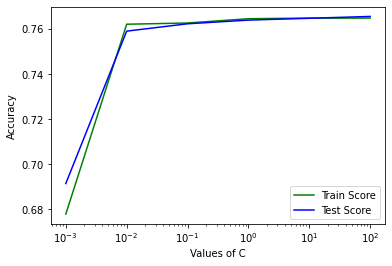

In [265]:
%matplotlib inline
plt.plot(c_range, trainkernalized, label = 'Train Score', c = 'g')
plt.plot(c_range, testkernalized, label = 'Test Score', c='b')
plt.xscale('log')
plt.xlabel('Values of C')
plt.ylabel('Accuracy')

plt.legend()

In [266]:
from sklearn.model_selection import GridSearchCV
#c1=np.linspace(0.01,1,100)

paramgridsvm = {'C':[10,12],
                    'gamma':[0.0001, 0.001,0.1], 
                    'kernel':['rbf','poly','linear']}
svck = SVC()
svckernel = GridSearchCV(svck, paramgridsvm, cv = 5, n_jobs= -1,scoring='recall')
svckernel.fit(XtrainK,ytraink)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 12], 'gamma': [0.0001, 0.001, 0.1],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='recall')

In [267]:
print("Best score- Kernelized SVM grid serach: ",svckernel.best_score_)
print("Best parameters- Kernelized SVM grid serach: ",svckernel.best_params_)

Best score- Kernelized SVM grid serach:  0.5868489167819027
Best parameters- Kernelized SVM grid serach:  {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}


__From the graph I am selecting c=10__

## a. kernel type : rbf

In [287]:
BestRbf = SVC(C = 10, gamma = 0.0001, kernel= 'rbf', verbose = True)

BestRbf.fit(XtrainK,ytraink)
ypredRbf = BestRbf.predict(XtestK)

print('Train score: {:.4f} '.format(BestRbf.score(XtrainK, ytraink)))
print('Test score: {:.4f} '.format(BestRbf.score(XtestK, ytestk)))

[LibSVM]Train score: 0.6778 
Test score: 0.6914 


In [288]:
print(classification_report(ypredRbf,ytestk ))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82      1228
           1       0.00      0.00      0.00         0

    accuracy                           0.69      1228
   macro avg       0.50      0.35      0.41      1228
weighted avg       1.00      0.69      0.82      1228



In [289]:
print(confusion_matrix(ypredRbf,ytestk))

[[849 379]
 [  0   0]]


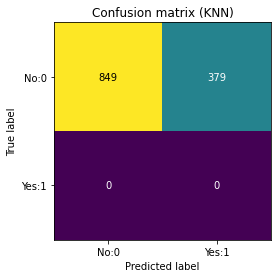

In [290]:
%matplotlib inline

scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(ypredRbf, ytestk), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [261]:
KernalizedSVM_rbf_recall_score = recall_score(ytestk, BestRbf.predict(XtestK))
print("Kernalized rbf Recall score: {:.2f}".format(recall_score(ytestk, BestRbf.predict(XtestK))))
KernalizedSVM_rbf_precision_score = precision_score(ytestk, BestRbf.predict(XtestK))
print("Kernalized rbf Preision score: {:.2f}".format(precision_score(ytestk, BestRbf.predict(XtestK))))
KernalizedSVM_rbf_f1_score = f1_score(ytestk, BestRbf.predict(XtestK))
print("Kernalized rbf F1 score: {:.2f}".format(f1_score(ytestk, BestRbf.predict(XtestK))))

Kernalized rbf Recall score: 0.00
Kernalized rbf Preision score: 0.00
Kernalized rbf F1 score: 0.00


In [ ]:
CompTable = CompTable + [['Kernalized SVM rbg Classifier', svckernel.best_params_ ,
                          BestRbf.score(X_train, y_train), 
                          BestRbf.score(X_test, y_test),
                          recall_score(ytestk, BestRbf.predict(XtestK)),
                          precision_score(ytestk, BestRbf.predict(XtestK)),  
                            f1_score(ytestk, BestRbf.predict(XtestK))]]
print('The summary kernel rbf:',[['Kernalized SVM rbg Classifier', 'C=0.01 & gamma = 1' ,
                          'Train Score:',BestRbf.score(X_train, y_train), 
                          'Test Score:',BestRbf.score(X_test, y_test)]])

## b. kernel type : linear

In [276]:
BestLinear = SVC(C = 0.01, cache_size = 200, gamma = 1, kernel= 'linear', verbose = True)

BestLinear.fit(XtrainK,ytraink)
ypredLinear = BestLinear.predict(XtestK)

print('Train score: ',(BestLinear.score(XtrainK, ytraink)))
print('Test score: ',(BestLinear.score(XtestK, ytestk)))

[LibSVM]Train score:  0.7633795164357512
Test score:  0.760586319218241


In [277]:
print(confusion_matrix(ypredLinear,ytestk))

[[732 177]
 [117 202]]


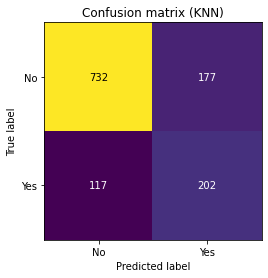

In [278]:
%matplotlib inline

scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(ypredLinear, ytestk), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No','Yes'],
    yticklabels=['No','Yes'], fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [279]:
KernalizedSVM_linear_recall_score = recall_score(ytestk, BestLinear.predict(XtestK))
print("Recall score: {:.2f}".format(recall_score(ytestk, BestLinear.predict(XtestK))))

KernalizedSVM_linear_precision_score = precision_score(ytestk, BestLinear.predict(XtestK))
print("Preision score: {:.2f}".format(precision_score(ytestk, BestLinear.predict(XtestK))))

KernalizedSVM_linear_f1_score = f1_score(ytestk, BestLinear.predict(XtestK))
print("F1 score: {:.2f}".format(f1_score(ytestk, BestLinear.predict(XtestK))))

Recall score: 0.53
Preision score: 0.63
F1 score: 0.58


In [280]:
 CompTable =  CompTable + [['Kernalized Linear Classifier', svckernel.best_params_  ,  
                            BestLinear.score(X_train, y_train), 
                            BestLinear.score(X_test, y_test),
                           recall_score(ytestk, BestLinear.predict(XtestK)),
                           precision_score(ytestk, BestLinear.predict(XtestK)),
                           f1_score(ytestk, BestLinear.predict(XtestK))]]
print('The summary of kernalized linear modes :',[['Kernalized SVM Linear Classifier', 'C=0.01 & gamma = 1' ,  
                            'Train SCores:',BestLinear.score(X_train, y_train), 
                            'Test Scores:',BestLinear.score(X_test, y_test)]])

The summary of kernalized linear modes : [['Kernalized SVM Linear Classifier', 'C=0.01 & gamma = 1', 'Train SCores:', 0.765009508285792, 'Test Scores:', 0.755700325732899]]


## c. kernel type : poly

In [281]:
BestPoly = SVC(C = 0.01, cache_size = 200, gamma = 1, kernel= 'poly', verbose = True)

BestPoly.fit(XtrainK,ytraink)
y_pred_poly = BestPoly.predict(XtestK)

print('Train score:  ',(BestPoly.score(XtrainK, ytraink)))
print('Test score:  ',format(BestPoly.score(XtestK, ytestk)))

[LibSVM]Train score:   0.7802227655528389
Test score:   0.757328990228013


In [282]:
print(classification_report(y_pred_poly,ytestk))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       889
           1       0.55      0.62      0.58       339

    accuracy                           0.76      1228
   macro avg       0.70      0.71      0.71      1228
weighted avg       0.77      0.76      0.76      1228



In [283]:
print(confusion_matrix(y_pred_poly,ytestk))


[[720 169]
 [129 210]]


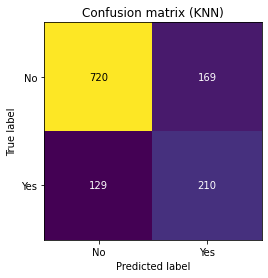

In [284]:
%matplotlib inline

scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_pred_poly, ytestk), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No','Yes'],
    yticklabels=['No','Yes'], fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()


In [285]:
KernalizedSVM_poly_recall_score = recall_score(ytestk, BestPoly.predict(XtestK))
print("Recall score: {:.2f}".format(recall_score(ytestk, BestPoly.predict(XtestK))))

KernalizedSVM_poly_precision_score = precision_score(ytestk, BestPoly.predict(XtestK))
print("Preision score: {:.2f}".format(precision_score(ytestk, BestPoly.predict(XtestK))))

KernalizedSVM_poly_f1_score = f1_score(ytestk, BestPoly.predict(XtestK))
print("F1 score: {:.2f}".format(f1_score(ytestk, BestPoly.predict(XtestK))))



Recall score: 0.55
Preision score: 0.62
F1 score: 0.58


In [286]:
CompTable = CompTable + [['Kernalized poly SVM Classifier', svckernel.best_params_ ,
                        BestPoly.score(X_train, y_train),
                          BestPoly.score(X_test, y_test),
                        recall_score(ytestk, BestPoly.predict(XtestK)),
                        precision_score(ytestk, BestPoly.predict(XtestK)),
                        f1_score(ytestk, BestPoly.predict(XtestK))]]

print('The summary of kernalized poly model :',[['Kernalized poly SVM Classifier', 'C=0.001 & gamma = 0.0001' ,
                          BestPoly.score(X_train, y_train),
                          BestPoly.score(X_test, y_test)]])

The summary of kernalized poly model : [['Kernalized poly SVM Classifier', 'C=0.001 & gamma = 0.001', 0.7698994838359141, 0.7858306188925082]]


# Descision Tree

In [291]:
from sklearn.tree import DecisionTreeClassifier

TreeTrain = []
TreeTest = []

for d in range(1,20):
    DTreess = DecisionTreeClassifier(max_depth = d, random_state = 0)
    DTreess.fit(X_train, y_train)
    TreeTrain.append(DTreess.score(X_train, y_train))
    TreeTest.append(DTreess.score(X_test, y_test))


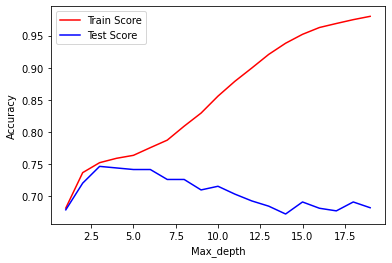

In [292]:
xaxis = range(1,20)

plt.plot(xaxis, TreeTrain, label = 'Train Score', c = 'r')
plt.plot(xaxis, TreeTest, label = 'Test Score', c = 'b')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()

In [293]:
param_grid_DTreess = {'max_depth' : range(1,20), 'min_samples_leaf' : range(2,50)}

DTreess_class = GridSearchCV(estimator = DTreess, cv = 10, param_grid = param_grid_DTreess , scoring = 'recall', verbose = 1, n_jobs = -1)
DTreess_model = DTreess_class.fit(X_train, y_train)

print('Best score _KNN GrideSearch :',DTreess_model.best_score_)

print('Best Parameter _KNN GrideSearch :',DTreess_model.best_params_)

Fitting 10 folds for each of 912 candidates, totalling 9120 fits
Best score _KNN GrideSearch : 0.5721353034912356
Best Parameter _KNN GrideSearch : {'max_depth': 5, 'min_samples_leaf': 2}


In [294]:
DTreess = DecisionTreeClassifier(max_depth = 5)

DTreess.fit(X_train, y_train)
y_pred_DTreess = DTreess.predict(X_test)

print('Train score:  ',(DTreess.score(X_train, y_train)))
print('Test score: ',(DTreess.score(X_test, y_test)))

Train score:   0.7636511817440913
Test score:  0.742671009771987


%matplotlib inline

def plot_feature_importances_cancer(model):
    fig, ax = plt.subplots(figsize=(20, 7))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(DTreess)

In [297]:
DTreess_scores = cross_val_score(DTreess, X_train,y_train, cv = 10)


cs=({"Cross-Validation scores": DTreess_scores})
cs1=pd.DataFrame(cs)
cs1

,Cross-Validation scores
0,0.780488
1,0.744565
2,0.777174
3,0.728261
4,0.755435
5,0.752717
6,0.739130
7,0.766304
8,0.684783
9,0.730978


In [298]:
print("Average cross-validation score: {:.2f}".format(DTreess_scores.mean()))

Average cross-validation score: 0.75


#### Grid searchCV for Decision Tree

In [299]:
best_DTreess = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 8)

best_DTreess.fit(X_train, y_train)
y_pred_DTreess = best_DTreess.predict(X_test)
print('Train score: {:.4f} '.format(best_DTreess.score(X_train, y_train)))
print('Test score: {:.4f} '.format(best_DTreess.score(X_test, y_test)))

Train score: 0.8093 
Test score: 0.7280 


In [300]:
print(confusion_matrix(y_pred_DTreess,y_test))

[[684 184]
 [150 210]]


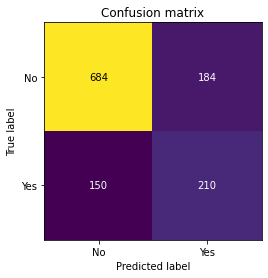

In [301]:
%matplotlib inline

scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_pred_DTreess, y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No','Yes'],
    yticklabels=['No','Yes'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [302]:
Decision_recall_score = recall_score(y_test, best_DTreess.predict(X_test))
print('Recall score : {:.4f}'.format(recall_score(y_test, best_DTreess.predict(X_test))))

Decision_precision_score = precision_score(y_test,best_DTreess.predict(X_test))
print('precision score : {:.4f} '.format(precision_score(y_test, best_DTreess.predict(X_test))))

Decision_f1_score = f1_score(y_test, best_DTreess.predict(X_test))
print('f1 score : {:.4f} '.format(f1_score(y_test, best_DTreess.predict(X_test))))

Recall score : 0.5330
precision score : 0.5833 
f1 score : 0.5570 


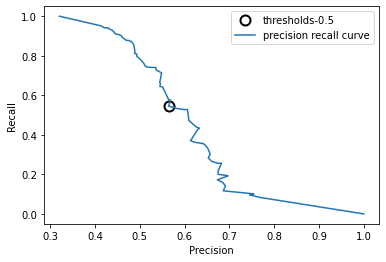

In [303]:
import mglearn
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_DTreess.predict_proba(X_test)[:,1])

closezero_ = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[closezero_], recall[closezero_], 'o', markersize=10,
         label="thresholds-0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [308]:
target_var=temp['Churn']

In [309]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DTreess_names= temp.columns
DTreess_target=target_var.unique().astype(str).tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

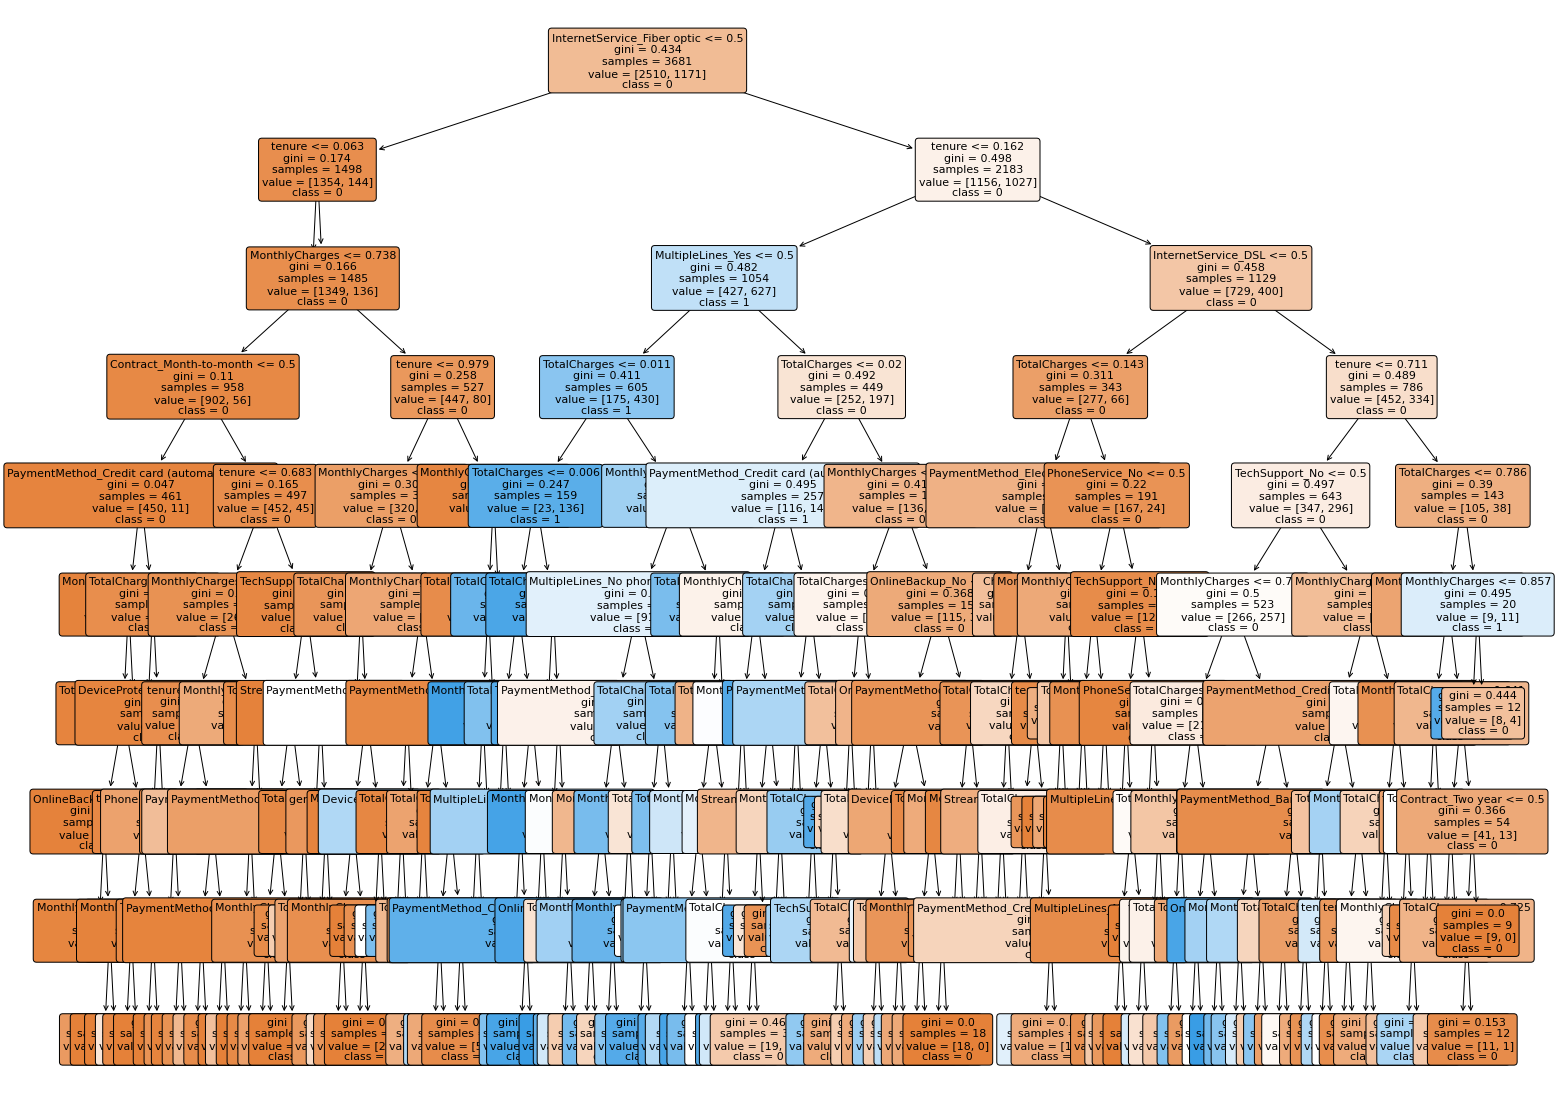

In [310]:
plt.figure(figsize=(25,20))
plot_tree(best_DTreess,feature_names=DTreess_names,class_names=DTreess_target,
          filled=True,rounded=True,fontsize=11)
plt.savefig('Decision Tree.png')
plt.show

In [305]:
CompTable = CompTable + [['Decision Tress Classifier', DTreess_model.best_params_, 
                          best_DTreess.score(X_train, y_train),
                          best_DTreess.score(X_test, y_test),
                         recall_score(y_test, best_DTreess.predict(X_test)),
                         precision_score(y_test, best_DTreess.predict(X_test)),
                          f1_score(y_test, best_DTreess.predict(X_test))
                         ]]
print('The summary of decision tress is:',[['Decision Tress Classifier', 'Max depth =7', 
                          'Train SCores:',best_DTreess.score(X_train, y_train),
                          'Test Scores:',best_DTreess.score(X_test, y_test) ]])


The summary of decision tress is: [['Decision Tress Classifier', 'Max depth =7', 'Train SCores:', 0.8092909535452323, 'Test Scores:', 0.7280130293159609]]


In [306]:
CompTable1 = pd.DataFrame(CompTable,columns = ['Model name','Model parameter', 'Train accuracy ', 'Test accuracy ','recall_Score',
                                              'Precision_Score','F1_Score'])
CompTable1.index = CompTable1['Model name']
CompTable1.round(2)
CompTable1

,Model name,Model parameter,Train accuracy,Test accuracy,recall_Score,Precision_Score,F1_Score
Model name,,,,,,,
KNN Classification,KNN Classification,"{'metric': 'euclidean', 'n_neighbors': 18, 'p'...",0.998642,0.728013,0.563452,0.578125,0.570694
Logistic Regression,Logistic Regression,"{'C': 0.5310526315789474, 'max_iter': 13, 'pen...",0.766368,0.754886,0.576142,0.628809,0.601325
Logistic Regression,Logistic Regression,"{'C': 0.5310526315789474, 'max_iter': 13, 'pen...",0.766368,0.754886,0.576142,0.628809,0.601325
Linear SVM Classifier,Linear SVM Classifier,"{'C': 100, 'max_iter': 20}",0.720185,0.728013,0.697970,0.561224,0.622172
Kernalized Linear Classifier,Kernalized Linear Classifier,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}",0.765010,0.755700,0.532982,0.633229,0.578797
Kernalized poly SVM Classifier,Kernalized poly SVM Classifier,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}",0.769899,0.785831,0.554090,0.619469,0.584958
Decision Tress Classifier,Decision Tress Classifier,"{'max_depth': 5, 'min_samples_leaf': 2}",0.809291,0.728013,0.532995,0.583333,0.557029


Based on the table above, we can compare the Test accuracy, Recall Score, Precision Score and F1 Score for each of the models that were ran on the telecom data for predicting 'Churn'.

The Linear SVM classifier performed the best when using the measures of Test Accuracy, Recall Score and F1 Score. It has least gap between test and train score

Even though the Precision score is lower for the linear SVM Classifier, it still had the best F1 score which is based on the Precision and Recall metrics. Hence, the Linear SVM Classifier is the best model for Classification for the Telecom data in this project.

In [313]:
scaler = MinMaxScaler()
A = scaler.fit_transform(X)
B = y
linesvcm = LinearSVC(C = 100, max_iter = 20)

scores = cross_val_score(linesvcm, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: %.2f"%scores.mean())

Cross-validation scores: [0.75458248 0.73625255 0.68126273 0.74541752 0.68093782]
Average cross-validation score: 0.72
